# ML match for LOFAR and the combined PanSTARRS WISE catalogue: Compute the $Q_0$

## Configuration

### Load libraries and setup

In [1]:
import numpy as np
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord, search_around_sky
from IPython.display import clear_output

In [2]:
from mltier1 import Field, Q_0, parallel_process, describe

In [3]:
%load_ext autoreload

In [4]:
%autoreload

In [5]:
from IPython.display import clear_output

In [6]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Area limits

In [7]:
# Busy week Hatfield 2017
ra_down = 170.
ra_up = 190.
dec_down = 46.8
dec_up = 55.9

In [8]:
field = Field(170.0, 190.0, 46.8, 55.9)

## Load data

In [16]:
combined = Table.read("pw.fits")

In [10]:
lofar_all = Table.read("data/LOFAR_HBA_T1_DR1_catalog_v0.9.srl.fits")

In [17]:
np.array(combined.colnames)

array(['AllWISE', 'objID', 'ra', 'dec', 'raErr', 'decErr', 'W1mag',
       'W1magErr', 'i', 'iErr'],
      dtype='<U8')

In [18]:
np.array(lofar_all.colnames)

array(['Source_Name', 'RA', 'E_RA', 'E_RA_tot', 'DEC', 'E_DEC',
       'E_DEC_tot', 'Peak_flux', 'E_Peak_flux', 'E_Peak_flux_tot',
       'Total_flux', 'E_Total_flux', 'E_Total_flux_tot', 'Maj', 'E_Maj',
       'Min', 'E_Min', 'PA', 'E_PA', 'Isl_rms', 'S_Code', 'Mosaic_ID',
       'Isl_id'],
      dtype='<U16')

### Filter catalogues

In [19]:
lofar = field.filter_catalogue(lofar_all, colnames=("RA", "DEC"))

### Sky coordinates

In [20]:
coords_combined = SkyCoord(combined['ra'], 
                           combined['dec'], 
                           unit=(u.deg, u.deg), 
                           frame='icrs')

In [21]:
coords_lofar = SkyCoord(lofar['RA'], 
                       lofar['DEC'], 
                       unit=(u.deg, u.deg), 
                       frame='icrs')

### Summary of galaxy types in the combined catalogue

In [22]:
combined_matched = (~np.isnan(combined["i"]) & 
                    ~np.isnan(combined["W1mag"]))
np.sum(combined_matched) # Matches

8196213

In [23]:
combined_panstarrs = (~np.isnan(combined["i"]) & 
                      np.isnan(combined["W1mag"]))
np.sum(combined_panstarrs) # Only PanSTARSS

13454849

In [24]:
combined_wise =(np.isnan(combined["i"]) & 
                ~np.isnan(combined["W1mag"]))
np.sum(combined_wise) # Only WISE

5023475

In [25]:
combined_i = combined_matched | combined_panstarrs
combined_w1 = combined_matched | combined_wise

## $Q_0$ dependence on the radius

We will iterate 10 times for each radius. However, the error is so small that a direct computation can be accurate to 4 significant figures.

In [26]:
n_iter = 10

In [27]:
rads = list(range(1,26))

### i-band

In [28]:
q_0_comp_i = Q_0(coords_lofar, coords_combined[combined_i], field)

In [29]:
q_0_rad_i = []
for radius in rads:
    q_0_rad_aux = []
    for i in range(n_iter):
        out = q_0_comp_i(radius=radius)
        q_0_rad_aux.append(out)
    q_0_rad_i.append(np.mean(q_0_rad_aux))
    print("{:2d} {:7.5f} +/- {:7.5f} [{:7.5f} {:7.5f}]".format(radius, 
            np.mean(q_0_rad_aux), np.std(q_0_rad_aux), 
            np.min(q_0_rad_aux), np.max(q_0_rad_aux)))

 1 0.37316 +/- 0.00017 [0.37293 0.37350]
 2 0.46307 +/- 0.00027 [0.46248 0.46340]
 3 0.48759 +/- 0.00040 [0.48707 0.48846]
 4 0.50043 +/- 0.00032 [0.49990 0.50089]
 5 0.50832 +/- 0.00078 [0.50660 0.50905]
 6 0.51261 +/- 0.00084 [0.51082 0.51386]
 7 0.51713 +/- 0.00083 [0.51548 0.51890]
 8 0.52151 +/- 0.00055 [0.52094 0.52287]
 9 0.52650 +/- 0.00135 [0.52480 0.52914]
10 0.52844 +/- 0.00122 [0.52601 0.53068]
11 0.53098 +/- 0.00092 [0.52977 0.53251]
12 0.53432 +/- 0.00110 [0.53174 0.53605]
13 0.53604 +/- 0.00216 [0.53221 0.54111]
14 0.53805 +/- 0.00174 [0.53516 0.54048]
15 0.54255 +/- 0.00173 [0.54031 0.54671]
16 0.54436 +/- 0.00192 [0.54062 0.54671]
17 0.54738 +/- 0.00331 [0.54115 0.55307]
18 0.55116 +/- 0.00318 [0.54536 0.55503]
19 0.55111 +/- 0.00385 [0.54200 0.55594]
20 0.55325 +/- 0.00458 [0.54659 0.55919]
21 0.56013 +/- 0.00395 [0.55541 0.56833]
22 0.56401 +/- 0.00592 [0.55112 0.57534]
23 0.56483 +/- 0.00417 [0.55794 0.57078]
24 0.57286 +/- 0.00472 [0.56554 0.57964]
25 0.57028 +/- 0

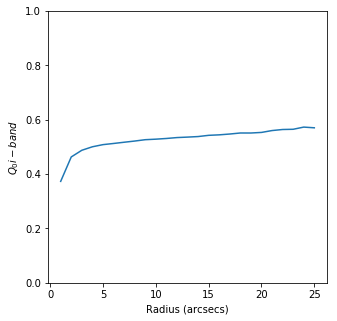

In [30]:
plt.rcParams["figure.figsize"] = (5,5)
plot(rads, q_0_rad_i)
xlabel("Radius (arcsecs)")
ylabel("$Q_0 i-band$")
ylim([0, 1]);

### W1-band

In [31]:
q_0_comp_w1 = Q_0(coords_lofar, coords_combined[combined_w1], field)

In [32]:
q_0_rad_w1 = []
for radius in rads:
    q_0_rad_aux = []
    for i in range(n_iter):
        out = q_0_comp_w1(radius=radius)
        q_0_rad_aux.append(out)
    q_0_rad_w1.append(np.mean(q_0_rad_aux))
    print("{:2d} {:7.5f} +/- {:7.5f} [{:7.5f} {:7.5f}]".format(radius, 
            np.mean(q_0_rad_aux), np.std(q_0_rad_aux), 
            np.min(q_0_rad_aux), np.max(q_0_rad_aux)))

 1 0.45858 +/- 0.00007 [0.45849 0.45871]
 2 0.60395 +/- 0.00020 [0.60370 0.60433]
 3 0.65114 +/- 0.00019 [0.65087 0.65148]
 4 0.67654 +/- 0.00029 [0.67616 0.67714]
 5 0.69270 +/- 0.00026 [0.69227 0.69320]
 6 0.70593 +/- 0.00048 [0.70523 0.70660]
 7 0.71875 +/- 0.00036 [0.71805 0.71929]
 8 0.73102 +/- 0.00048 [0.73038 0.73205]
 9 0.74416 +/- 0.00037 [0.74366 0.74501]
10 0.75433 +/- 0.00049 [0.75341 0.75523]
11 0.76261 +/- 0.00058 [0.76147 0.76374]
12 0.76616 +/- 0.00050 [0.76515 0.76678]
13 0.77024 +/- 0.00099 [0.76861 0.77188]
14 0.77493 +/- 0.00090 [0.77325 0.77647]
15 0.77681 +/- 0.00105 [0.77505 0.77851]
16 0.77747 +/- 0.00108 [0.77575 0.77931]
17 0.77740 +/- 0.00108 [0.77591 0.77948]
18 0.77787 +/- 0.00136 [0.77541 0.78045]
19 0.77758 +/- 0.00150 [0.77597 0.78125]
20 0.77740 +/- 0.00144 [0.77448 0.77930]
21 0.77475 +/- 0.00147 [0.77269 0.77788]
22 0.77419 +/- 0.00137 [0.77114 0.77557]
23 0.76988 +/- 0.00136 [0.76790 0.77323]
24 0.76825 +/- 0.00185 [0.76494 0.77110]
25 0.76363 +/- 0

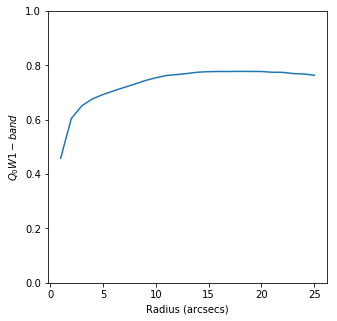

In [33]:
plt.rcParams["figure.figsize"] = (5,5)
plot(rads, q_0_rad_w1)
xlabel("Radius (arcsecs)")
ylabel("$Q_0 W1-band$")
ylim([0, 1]);